In [293]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Линейная регрессия

In [296]:
class MyLinearRegression:
    def __init__(self):
        self.weights = [] # коэффициенты
        self.costs_per_epoch = [] #значения свободного члена

    def fit(self, X, y, lr=0.01, epochs=1000):
        # Добавить один столбец с единицами для смещения
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
        self.weights = np.zeros(X.shape[1])

        # Обучение модели с использованием градиентного спуска
        for _ in range(epochs):
            predictions = np.dot(X, self.weights)
            errors = predictions - y
            self.weights -= lr * np.dot(X.T, errors) / len(y)
            self.costs_per_epoch.append(np.mean(errors ** 2))

    def predict(self, X):
        X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
        return np.dot(X, self.weights)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        total = np.sum((y_true - np.mean(y_true)) ** 2)
        residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (residual / total)

### Проверка на рандомных данных

In [298]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=1, noise=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 1) (600,)
(400, 1) (400,)


Predictions: [ -9.82756955 -24.90881717  65.71347273  30.66667238  29.6003723 ]
Mean Squared Error: 28.84
R^2 Score: 0.99


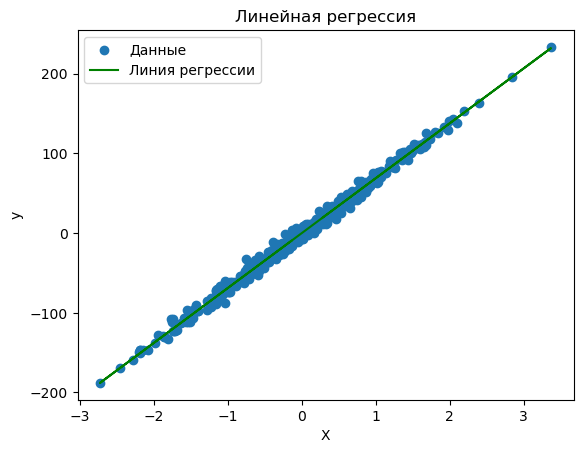

In [299]:
# Обучение
model = MyLinearRegression()
model.fit(X_train, y_train)

# Предсказание и метрики
y_pred = model.predict(X_test)
mse = model.mean_squared_error(y_test, y_pred)
r2 = model.r_squared(y_test, y_pred)

print(f'Predictions: {y_pred[:5]}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Уравнение прямой
X_test_reshaped = X_test.reshape(-1, 1)
lin_ur = model.predict(X_test_reshaped)

# Визуализация
plt.scatter(X_test, y_test, label='Данные')
plt.plot(X_test_reshaped, lin_ur, color='green', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

### Проверка sklearn

In [301]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

r_sq = lin_reg_model.score(X_test, y_test)
print(f'R^2 Score: {r_sq:.2f}')

R^2 Score: 0.99


(400, 1)


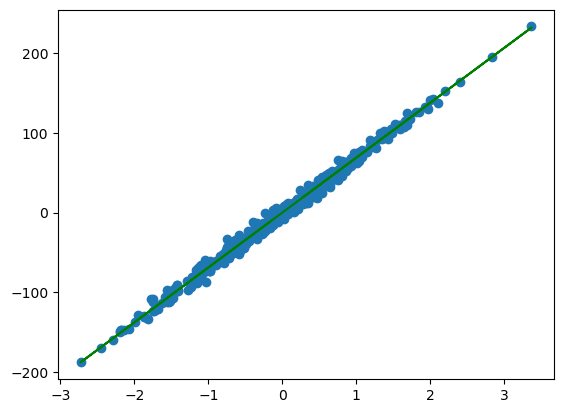

In [302]:
# Найденное значение коэфициента
b1 = lin_reg_model.coef_
# Найденное значение свободного члена
b0 = lin_reg_model.intercept_

X_test = X_test.reshape(-1,1)
print(X_test.shape)

# Уравнение прямой
lin_ur = X_test @ b1 + b0

# Визуализация
plt.scatter(X_test,y_test)
plt.plot(X_test,lin_ur, c='green')

# Логистическая регрессия

In [304]:
class MyLogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.errors = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def fit(self, X, y, lr=0.01, epochs=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            predictions = self.predict_proba(X)

            # Градиентный спуск
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= lr * dw
            self.bias -= lr * db

            error = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.errors.append(error)

    def predict(self, X):
        predictions_probs = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in predictions_probs]

    def metrics(self, y_true, y_pred):
        confusion_matrix = np.zeros((len(np.unique(y_true)), len(np.unique(y_true))), dtype=int)
        
        for true, pred in zip(y_true, y_pred):
            confusion_matrix[true][pred] += 1
        
        return confusion_matrix

    def evaluate_metrics(self, y_true, y_pred):
        confusion_matrix = self.metrics(y_true, y_pred)
        
        precision = []
        recall = []
        f1_score = []

        for i in range(confusion_matrix.shape[0]):
            tp = confusion_matrix[i][i]
            fp = confusion_matrix[:, i].sum() - tp
            fn = confusion_matrix[i].sum() - tp
            
            precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
            
            if precision_i + recall_i > 0:
                f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
            else:
                f1_i = 0
            
            precision.append(precision_i)
            recall.append(recall_i)
            f1_score.append(f1_i)

        return precision, recall, f1_score

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

### Проверка на рандомных данных

In [306]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 20) (600,)
(400, 20) (400,)


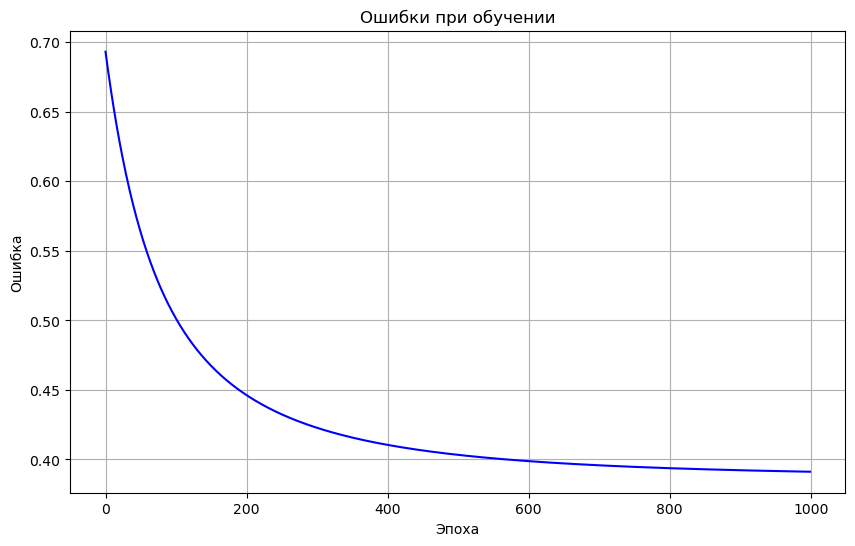

Class 0 - Precision: 0.9091, Recall: 0.8738, F1 Score: 0.8911
Class 1 - Precision: 0.8713, Recall: 0.9072, F1 Score: 0.8889
Accuracy: 0.89


In [307]:
# Обучение
model = MyLogisticRegression()
model.fit(X_train, y_train)

# Визуализация ошибок обучения
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.errors)), model.errors, color='blue')
plt.title('Ошибки при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.grid()
plt.show()

# Предсказание и метрики
y_pred = model.predict(X_test)

precision, recall, f1_score = model.evaluate_metrics(y_test, y_pred)
for i, (precision_cl, recall_cl, f1_cl) in enumerate(zip(precision, recall, f1_score)):
    print(f"Class {i} - Precision: {precision_cl:.4f}, Recall: {recall_cl:.4f}, F1 Score: {f1_cl:.4f}")

print("Accuracy:", model.accuracy(y_test, y_pred))

### Проверка sklearn

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(X_train, y_train)

print(f"Сдвиг (b0): {log_reg_model.intercept_}")
print(f"Коэффициенты (b1): {log_reg_model.coef_}")

# Предсказание
y_pred = log_reg_model.predict(X_test)

print("\nОтчёт о классификации")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = log_reg_model.score(X_test, y_test)
print(f"\Точность: {accuracy:.3f}")

Сдвиг (b0): [0.08693474]
Коэффициенты (b1): [[ 2.55122809e-04  4.94927149e-01  5.34656669e-02  1.40790811e-03
  -1.82329930e-01  2.08735884e-01 -2.62023826e-02 -1.50902191e-01
  -1.31325624e-01 -7.36233925e-03 -8.35617947e-02  5.61212615e-02
   5.44560654e-02 -7.24229410e-02 -8.03088898e-03 -8.07861715e-01
  -2.75693416e-02  3.86962914e-03  1.14270485e-01  1.01225491e+00]]

Отчёт о классификации
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       206
           1       0.88      0.90      0.89       194

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:
[[182  24]
 [ 19 175]]
\Точность: 0.892


# Многоклассовая логистическая регрессия

In [311]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

class MyOneVsRestClassifier:
    def __init__(self):
        self.classifiers = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.classifiers = []

        for cls in self.classes_:
            y_binary = (y == cls).astype(int)  # для каждого класса двоичная метка
            clf = MyLogisticRegression()    
            clf.fit(X, y_binary)            # классификатор на двоичные метки
            self.classifiers.append(clf)

    def predict(self, X):
        predictions = np.array([clf.predict_proba(X) for clf in self.classifiers]).T
        return np.argmax(predictions, axis=1)  # вернуть класс с наибольшей вероятностью

    def predict_proba(self, X):
        # для каждого класса
        return np.array([clf.predict_proba(X) for clf in self.classifiers]).T

    def accuracy(self, X, y_true):
        y_pred = self.predict(X)
        accuracy = np.mean(y_true == y_pred)
        return accuracy

    def metrics(self, y_true, y_pred):
        confusion_matrix = np.zeros((len(np.unique(y_true)), len(np.unique(y_true))), dtype=int)
        
        for true, pred in zip(y_true, y_pred):
            confusion_matrix[true][pred] += 1
        
        return confusion_matrix

    def evaluate_metrics(self, y_true, y_pred):
        confusion_matrix = self.metrics(y_true, y_pred)
        
        precision = []
        recall = []
        f1_score = []

        for i in range(confusion_matrix.shape[0]):
            tp = confusion_matrix[i][i]
            fp = confusion_matrix[:, i].sum() - tp
            fn = confusion_matrix[i].sum() - tp
            
            precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
            
            if precision_i + recall_i > 0:
                f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
            else:
                f1_i = 0
            
            precision.append(precision_i)
            recall.append(recall_i)
            f1_score.append(f1_i)

        return precision, recall, f1_score

# Логистическа регрессия для нашего датасет

In [313]:
# Загружаем датасет
import numpy as np
import pandas as pd
df_train = pd.read_csv('dataset/train.csv', index_col='id')
df_test = pd.read_csv('dataset/test.csv', index_col='id')
df_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled


In [314]:
# Категориальные признаки
categorical_columns = [
    "Marital status", "Application mode", "Application order", "Course",
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]
# числовые признаки
numerical_columns = [
    "Previous qualification (grade)", "Admission grade", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP"
]


print("Categorical Columns:")
for column in categorical_columns:
    print(column)

print("\n")

print("Numerical Columns:")
for column in numerical_columns:
    print(column)

Categorical Columns:
Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International


Numerical Columns:
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


In [315]:
from sklearn.preprocessing import LabelEncoder

# Используем LabelEncoder для кодирования уникальных значений
le = LabelEncoder()
df_train['Target'] = le.fit_transform(df_train['Target'])

# Находим уникальные значения и сортируем их по порядку
unique_values = sorted(zip(le.transform(le.classes_), le.classes_))

# Проверяем результат
print("Преобразованные значения 'Target':", df_train['Target'].unique())

Преобразованные значения 'Target': [2 0 1]


In [316]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Применяем нормализацию
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

# Проверяем результат
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,0.326316,1,1,19,...,0.0,0.260870,0.212121,0.30,0.690476,0.0,0.406977,0.311111,0.803170,2
1,1,17,1,9238,1,1,0.315789,1,19,19,...,0.0,0.260870,0.272727,0.00,0.000000,0.0,0.406977,0.311111,0.803170,0
2,1,17,2,9254,1,1,0.442105,1,3,19,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,1.000000,0.244444,0.414795,0
3,1,1,3,9500,1,1,0.378947,1,19,3,...,0.0,0.347826,0.333333,0.35,0.712222,0.0,0.406977,0.311111,0.803170,1
4,1,1,2,9500,1,1,0.389474,1,19,37,...,0.0,0.304348,0.363636,0.30,0.718519,0.0,0.000000,0.755556,0.578600,2


In [317]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['Target'])
y = df_train['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(61214, 36) (61214,)
(15304, 36) (15304,)


### Наш класс многоклассовой регрессии

In [323]:
# Обучаем модель "один против всех"
ovr_classifier = MyOneVsRestClassifier()
ovr_classifier.fit(X_train, y_train)

# Предсказания
predictions = ovr_classifier.predict(X_test)

# Вычисление метрик
accuracy = ovr_classifier.accuracy(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

precision, recall, f1_score = model.evaluate_metrics(y_test, y_pred)
for i, (precision_cl, recall_cl, f1_cl) in enumerate(zip(precision, recall, f1_score)):
    print(f"Class {i} - Precision: {precision_cl:.4f}, Recall: {recall_cl:.4f}, F1 Score: {f1_cl:.4f}")

Accuracy: 0.33
Class 0 - Precision: 0.3682, Recall: 0.5481, F1 Score: 0.4405
Class 1 - Precision: 0.1910, Recall: 0.4872, F1 Score: 0.2744
Class 2 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


### Класс sklearn многолассовой регрессии

In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg_model.fit(X_train, y_train)

# print(f"Сдвиг (b0): {log_reg_model.intercept_}")
# print(f"Коэффициенты (b1): {log_reg_model.coef_}")

# Предсказание
y_pred = log_reg_model.predict(X_test)

print("\nОтчёт о классификации")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = log_reg_model.score(X_test, y_test)
print(f"\Точность: {accuracy:.3f}")


Отчёт о классификации
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5028
           1       0.63      0.34      0.44      3017
           2       0.79      0.95      0.86      7259

    accuracy                           0.79     15304
   macro avg       0.75      0.71      0.71     15304
weighted avg       0.78      0.79      0.77     15304

Confusion Matrix:
[[4199  391  438]
 [ 603 1011 1403]
 [ 163  211 6885]]
\Точность: 0.790


In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Создаем модель логистической регрессии
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Обучаем модель с использованием One-vs-Rest классификации
ovr_classifier = OneVsRestClassifier(log_reg)
ovr_classifier.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке
y_pred = ovr_classifier.predict(X_test)

# Оценка модели
print("Отчет о классификации:\n", classification_report(y_test, y_pred))
accuracy = ovr_classifier.score(X_test, y_test)
print(f"\Точность: {accuracy:.3f}")

C:\Users\elina\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elina\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      5028
           1       0.49      0.19      0.27      3017
           2       0.72      0.93      0.81      7259

    accuracy                           0.74     15304
   macro avg       0.69      0.64      0.64     15304
weighted avg       0.72      0.74      0.71     15304

\Точность: 0.744


C:\Users\elina\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
